In [ ]:
import numpy as np
import pandas as pd
# from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [ ]:
def Drake(Rs, fp, ne, fl, fi, fc, L):
    """
    The Drake Equation
    N = number of civilizations with which humans could communicate
    Rs = mean rate of star formation
    fp = fraction of stars that have planets
    ne = mean number of planets that could support life per star with planets
    fl = fraction of life-supporting planets that develop life
    fi = fraction of planets with life where life develops intelligence
    fc = fraction of intelligent civilizations that develop communication
    L = mean length of time that civilizations can communicate
    """
    return round(Rs * fp * ne * fl * fi * fc * L)


In [ ]:
# best estimate for a solution to the Drake equation

Rs = 2  # star formation per galaxy (ie, milky way)
fp = 1
ne = 0.4
fl = 1  # seems optimistic to me
fi = 1  # seems optimistic to me
fc = 0.1  # looks like a complete guess 
L = 1000  # maybe between 1000 and 100_000_000

Drake(Rs, fp, ne, fl, fi, fc, L)

80

In [ ]:
def TimeDependentDrake(Rs, fp, ne, fl, fi, fc, L, 
    year=10_000_000_000, # default = NOW, approx 10B yr since 2nd gen stars
    avg_years_to_form_life=4_000_000_000, # approx 4B yr star to first life
    avg_years_to_get_intelligence=1_000_000_000): # approx 1B yr until intelligence

    """
    based on the Drake Equation but incorporates time.
    year is the approximate years since second generation stars formed
        life was unlikely in a first generation star
        10 billion years is an order of magnitude approximation

    avg_years_to_form_life assumes life is inevitable, but takes time to form
        could be thousands, millions, or billions of years

    The Drake Equation
    N = number of civilizations with which humans could communicate
    Rs = mean rate of star formation
    fp = fraction of stars that have planets
    ne = mean number of planets that could support life per star with planets
    fl = fraction of life-supporting planets that develop life
    fi = fraction of planets with life where life develops intelligence
    fc = fraction of intelligent civilizations that develop communication
    L = mean length of time that civilizations can communicate
    """

    star_lifetime = 10_000_000_000  # using a star like the sun

    num_stars = 0
    num_planets = 0
    num_life = 0
    N = 0
    current_year = 0
    year_steps = 1_000_000
    
    # this is NOT probabilistic, just expected values, using fractions
    # next iteration could use Poisson and Monte Carlo 
    chance_of_life = year_steps / avg_years_to_form_life
    chance_of_intelligence = year_steps / avg_years_to_get_intelligence

    while current_year < year:

        # increment times affect approximations
        current_year += year_steps
        new_stars = Rs * year_steps
        dying_stars = num_stars * year_steps / star_lifetime

        # intelligence, then life, then planet, then star formation
        # so that each of these builds off the previous generation

        # fi = fraction of planets with life where life develops intelligence
        # only includes specied that will communicate
        N -= N * year_steps / L  # minus extinctions
        N = max(N, 0)
        N += (num_life - N) * chance_of_intelligence * fc
        # N *= L / year_steps  # use a factor, not exact lifetime
        

        # fl = fraction of life-supporting planets that develop life
        num_life += (num_planets - num_life) * chance_of_life  # only new life

        # planet formation in habitable zones
        # only new stars make new planets
        num_planets += fp * ne * new_stars
        num_planets -= fp * ne * dying_stars  # SUBTRACT DEAD STARS

        # star formation
        num_stars += Rs * year_steps
        num_stars -= dying_stars  # SUBTRACT DEAD STARS

    # N is the number of civilizations born this timestep
    N = N / year_steps  # normalise - intelligent at any given time

    return round(N)

In [ ]:
TimeDependentDrake(Rs, fp, ne, fl, fi, fc, L, year=10_000_000_000)

0

In [ ]:
TimeDependentDrake(Rs, fp, ne, fl, fi, fc, 100000000000000000, year=10_000_000_000)

1168

In [ ]:
TimeDependentDrake(Rs, fp, ne, fl, fi, fc, L, year=1_000_000_000_000)

1

In [ ]:
# best estimate for a solution to the Drake equation

Rs = 2  # star formation per galaxy (ie, milky way)
fp = 1
ne = 0.4
fl = 1  # seems optimistic to me
fi = 1  # seems optimistic to me
fc = 0.1  # looks like a complete guess 
L = 1000  # maybe between 1000 and 100_000_000

# Time Independent Drake Equation is the steady state solution
TimeDependentDrake(Rs, fp, ne, fl, fi, fc, L, year=10_000_000_000)

0

In [ ]:
for i in [0, 1, 10, 100, 1000, 10000]:
    print(TimeDependentDrake(Rs, fp, ne, fl, fi, fc, L, year=i*1000000000))

0
0
0
1
1
1


In [ ]:
Drake(Rs, fp, ne, fl, fi, fc, L)

80

# Graph it

In [ ]:
# def DrakeTime(year):
#     Rs = 2  # star formation per galaxy (ie, milky way)
#     fp = 1
#     ne = 0.4
#     fl = 1  # seems optimistic to me
#     fi = 1  # seems optimistic to me
#     fc = 0.1  # looks like a complete guess 
#     L = 1000  # maybe between 1000 and 100_000_000

#     # Time Independent Drake Equation is the steady state solution
#     return TimeDependentDrake(Rs, fp, ne, fl, fi, fc, L, year=year)

# # WAYYYYYYYYY too slow - rewrite function
# x = [x*1_000_000_000 for x in range(1000)]
# y = [DrakeTime(i) for i in x]

In [ ]:
def DrakeTime(list_of_years):

    """
    takes in a list of years and outputs the N for those years
    """

    end = list_of_years[-1]
    increment = list_of_years[1] - list_of_years[0]

    # CONSTANTS
    Rs = 2
    fp = 1
    ne = 0.4
    fl = 1
    fi = 1
    fc = 0.1
    L = 1000
    avg_years_to_form_life = 4_000_000_000
    avg_years_to_get_intelligence = 1_000_000_000

    # Variables
    num_stars = 0
    num_planets = 0
    num_life = 0
    N_list = []
    N = 0
    current_year = 0
    year_steps = 1_000_000

    # ADD ERROR CHECKING
    # year steps should include all inputted years
    if increment % year_steps != 0:
        pass
    
    chance_of_life = year_steps / avg_years_to_form_life
    chance_of_intelligence = year_steps / avg_years_to_get_intelligence

    while current_year < end:

        # increment times affect approximations
        current_year += year_steps
        new_stars = Rs * year_steps

        # intelligence, then life, then planet, then star formation
        # so that each of these builds off the previous generation

        # fi = fraction of planets with life where life develops intelligence
        # only includes specied that will communicate
        N += (num_life - N) * chance_of_intelligence * fc
                
        # minus extinctions
        N *= (L / year_steps)

        # fl = fraction of life-supporting planets that develop life
        num_life += (num_planets - num_life) * chance_of_life  # only new life

        # planet formation in habitable zones
        num_planets += fp * ne * new_stars  # only new stars make new planets

        # star formation
        num_stars += Rs * year_steps

        if current_year in list_of_years:
            N_list.append(round(N * L / year_steps))

    return N_list

In [ ]:
x = [x*1_000_000_000 for x in range(1,1001)]
y = DrakeTime(x)

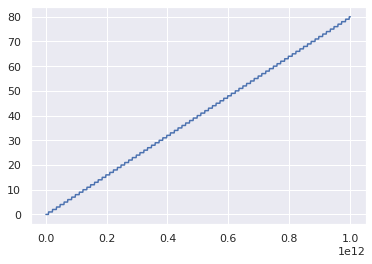

In [ ]:
sns.lineplot(y=y, x=x)

In [ ]:
TimeDependentDrake(Rs, fp, ne, fl, fi, fc, L, year=1_000_000_000_000)

80

In [ ]:
TimeDependentDrake(Rs, fp, ne, fl, fi, fc, L, year=100_000_000_000_000)

8008

In [ ]:
#  ERROR CHECKING
# year steps should include all inputted years
year_steps = 2300000
increment = 1000000000

# if increment % year_steps != 0:
#     increment // year_steps
#     year_steps = increment // (increment // year_steps)

# year_steps


new = increment / round(increment / year_steps)
new


2298850.574712644